In [24]:
import seaborn as sb

In [23]:
tips = sb.load_dataset('tips')

In [25]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


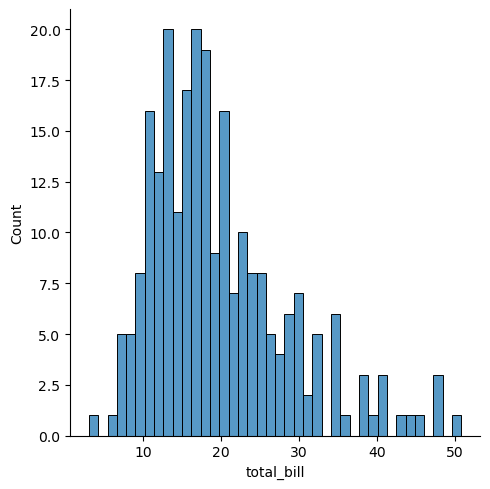

In [7]:
sb.displot(tips["total_bill"], kde=False,bins=40)

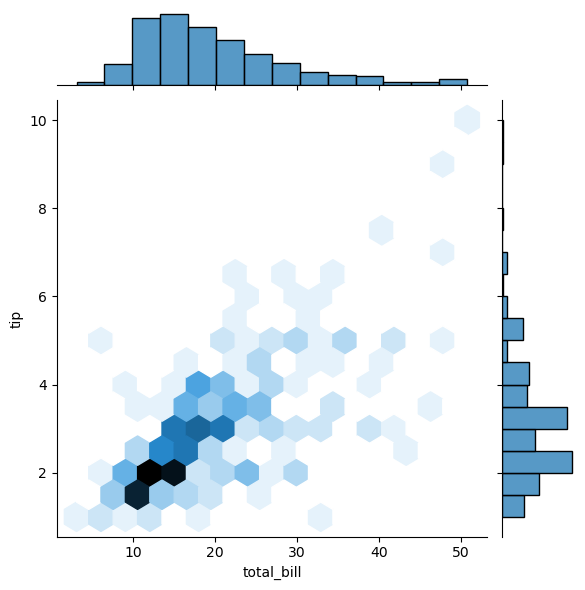

In [27]:
sb.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

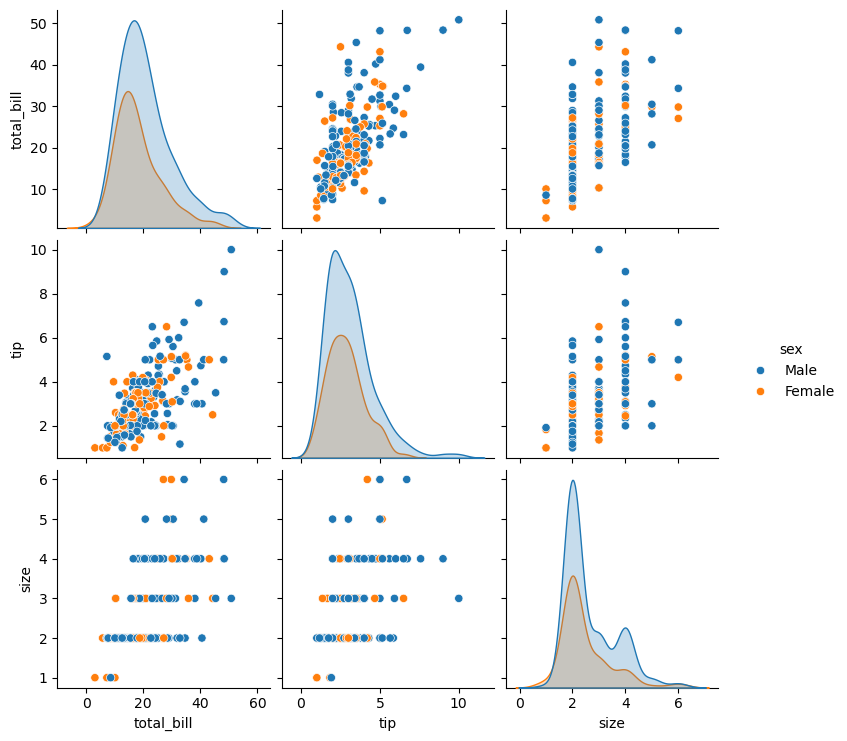

In [29]:
sb.pairplot(tips,hue='sex')

<Axes: xlabel='total_bill'>

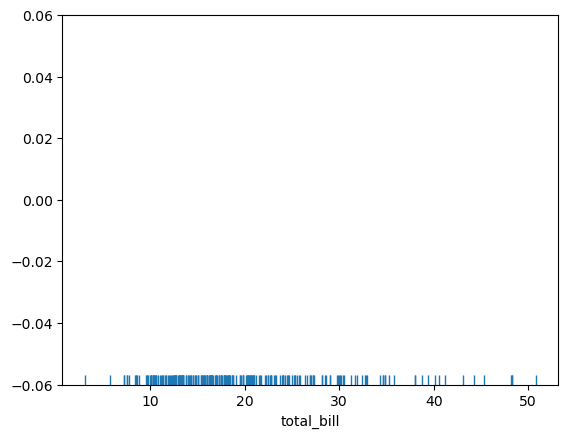

In [31]:
sb.rugplot(tips['total_bill'])

(0.0, 1.0)

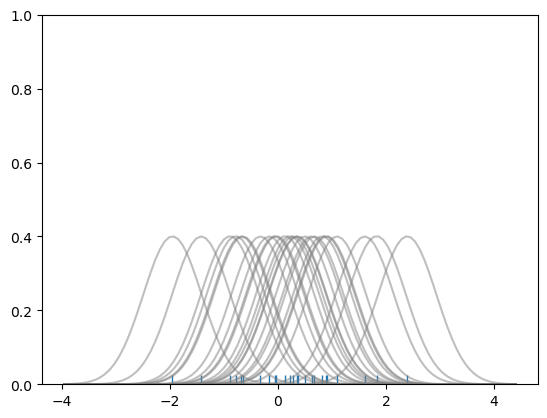

In [34]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sb.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

In [35]:
dataset = np.random.randn(25)

In [37]:
x_axis

array([-3.95156028, -3.86726815, -3.78297602, -3.6986839 , -3.61439177,
       -3.53009965, -3.44580752, -3.36151539, -3.27722327, -3.19293114,
       -3.10863902, -3.02434689, -2.94005477, -2.85576264, -2.77147051,
       -2.68717839, -2.60288626, -2.51859414, -2.43430201, -2.35000988,
       -2.26571776, -2.18142563, -2.09713351, -2.01284138, -1.92854925,
       -1.84425713, -1.759965  , -1.67567288, -1.59138075, -1.50708863,
       -1.4227965 , -1.33850437, -1.25421225, -1.16992012, -1.085628  ,
       -1.00133587, -0.91704374, -0.83275162, -0.74845949, -0.66416737,
       -0.57987524, -0.49558311, -0.41129099, -0.32699886, -0.24270674,
       -0.15841461, -0.07412249,  0.01016964,  0.09446177,  0.17875389,
        0.26304602,  0.34733814,  0.43163027,  0.5159224 ,  0.60021452,
        0.68450665,  0.76879877,  0.8530909 ,  0.93738302,  1.02167515,
        1.10596728,  1.1902594 ,  1.27455153,  1.35884365,  1.44313578,
        1.52742791,  1.61172003,  1.69601216,  1.78030428,  1.86

Text(0.5, 0.98, 'Sum of the Basis Functions')

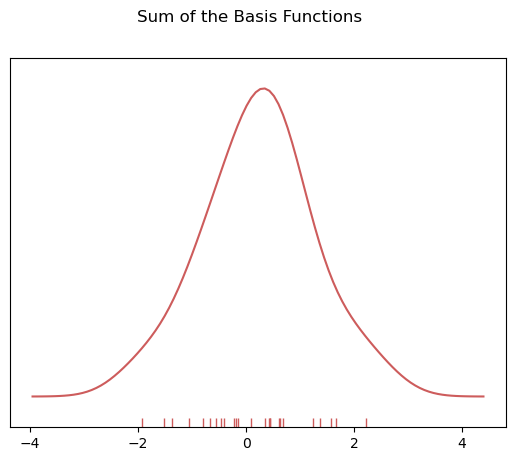

In [39]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sb.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")


In [ ]:
# KDE is the line which you can turn it off and on when you want to.

# **Catergorical Plots**

<Axes: xlabel='sex', ylabel='total_bill'>

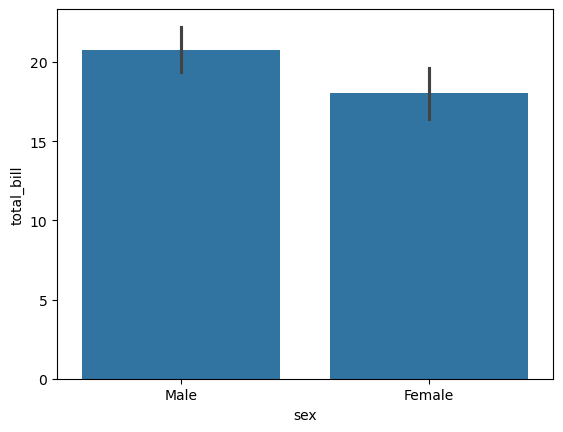

In [40]:
sb.barplot(x='sex', y='total_bill', data=tips)

In [43]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


<Axes: xlabel='sex', ylabel='count'>

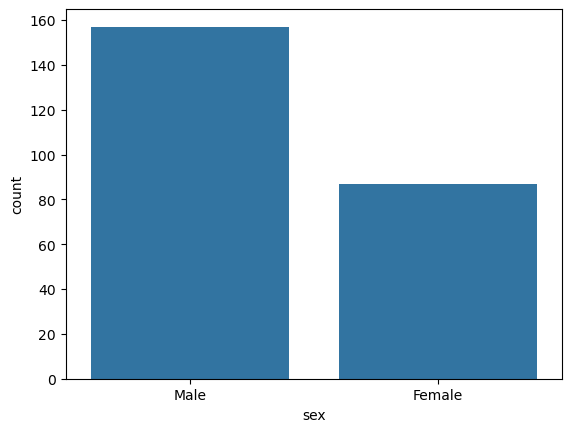

In [41]:
sb.countplot(x='sex',data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

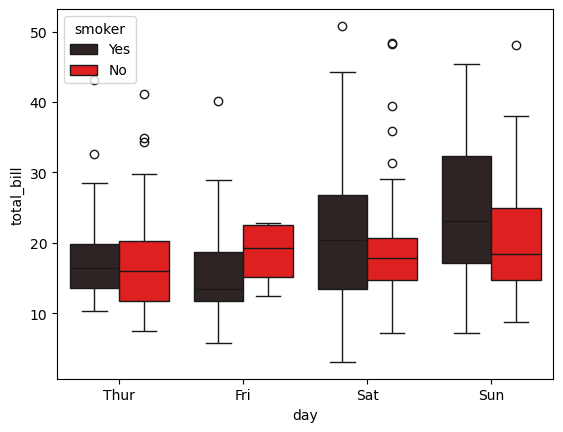

In [47]:
sb.boxplot(x='day',y='total_bill',data=tips,palette='dark:red',hue='smoker')

<Axes: xlabel='day', ylabel='total_bill'>

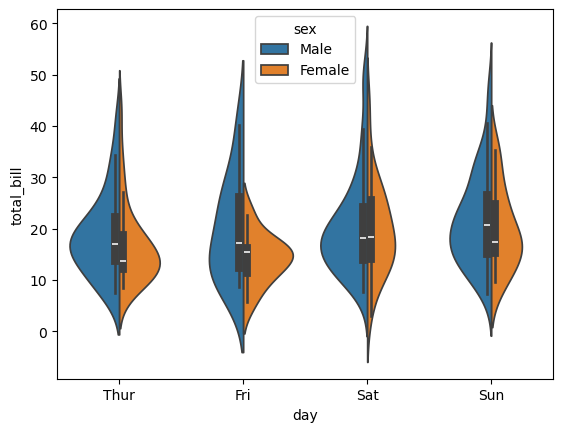

In [52]:
sb.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

<Axes: xlabel='day', ylabel='total_bill'>

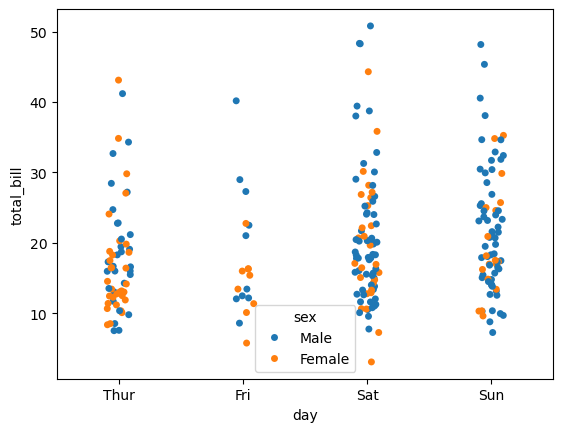

In [56]:
sb.stripplot(x='day',y='total_bill',data=tips,hue='sex')

# **Matrix Plots**

In [58]:
import seaborn as sb
tips = sb.load_dataset('tips')
flights = sb.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [59]:
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [62]:
tc = tips.corr(numeric_only=True)

In [63]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

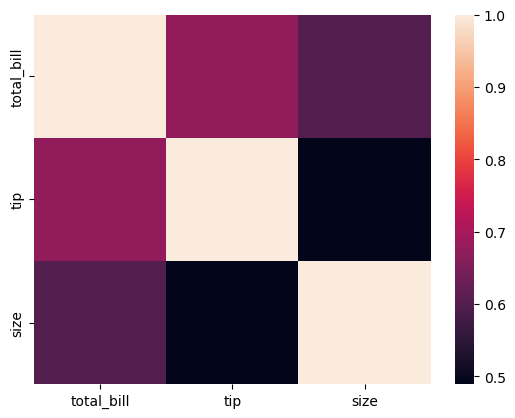

In [64]:
sb.heatmap(tc)

In [66]:
flights.head(10)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


In [70]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')

C:\Users\MuzuvukileNqwiliso\AppData\Local\Temp\ipykernel_30124\3579568968.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  fp = flights.pivot_table(index='month',columns='year',values='passengers')


<Axes: xlabel='year', ylabel='month'>

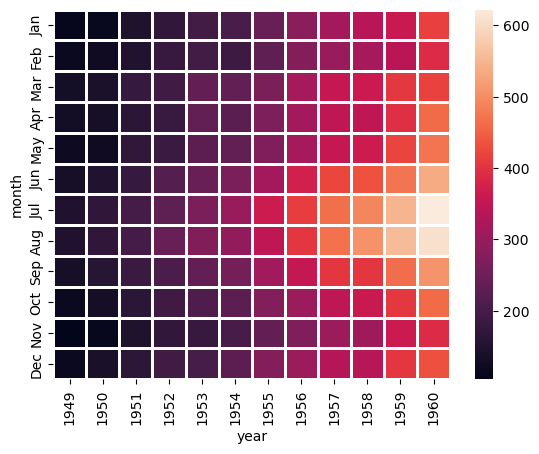

In [72]:
sb.heatmap(fp,linecolor='white',linewidths=1)

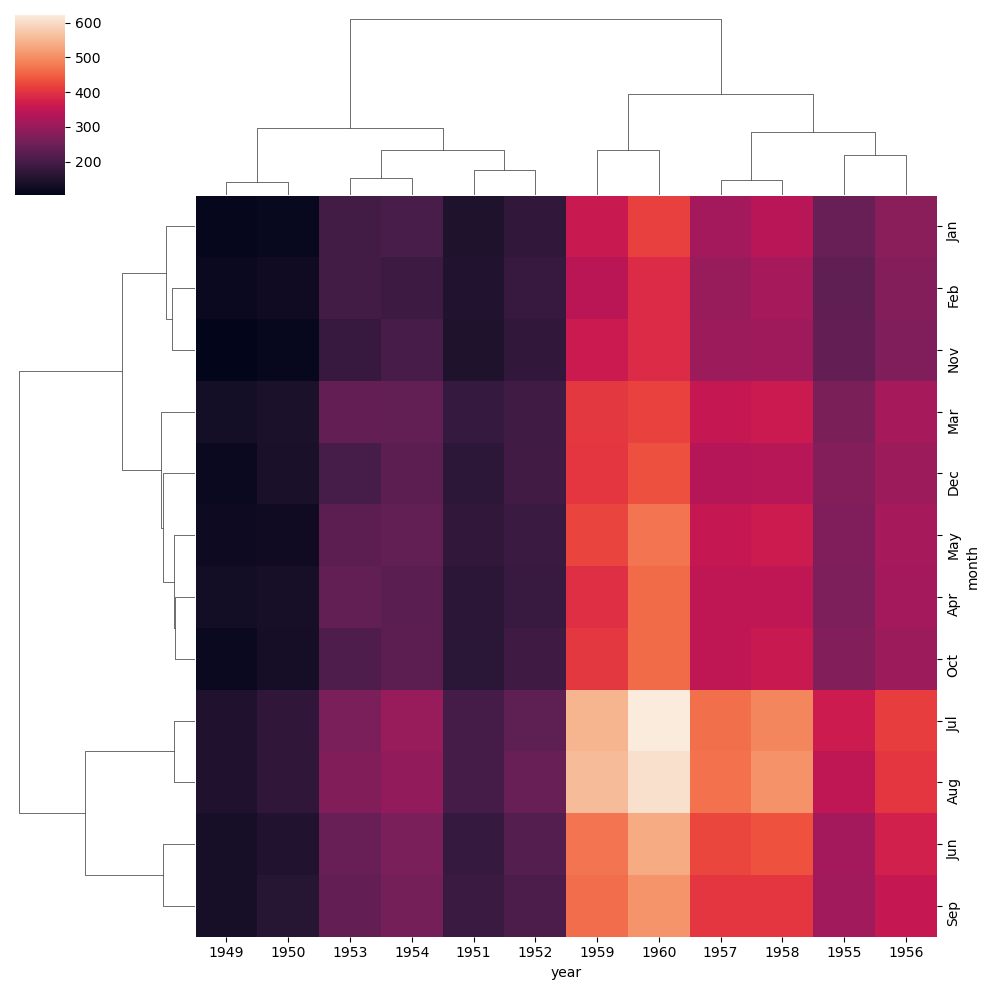

In [73]:
sb.clustermap(fp)

# **Grid**

In [75]:
import seaborn as sb
iris = sb.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


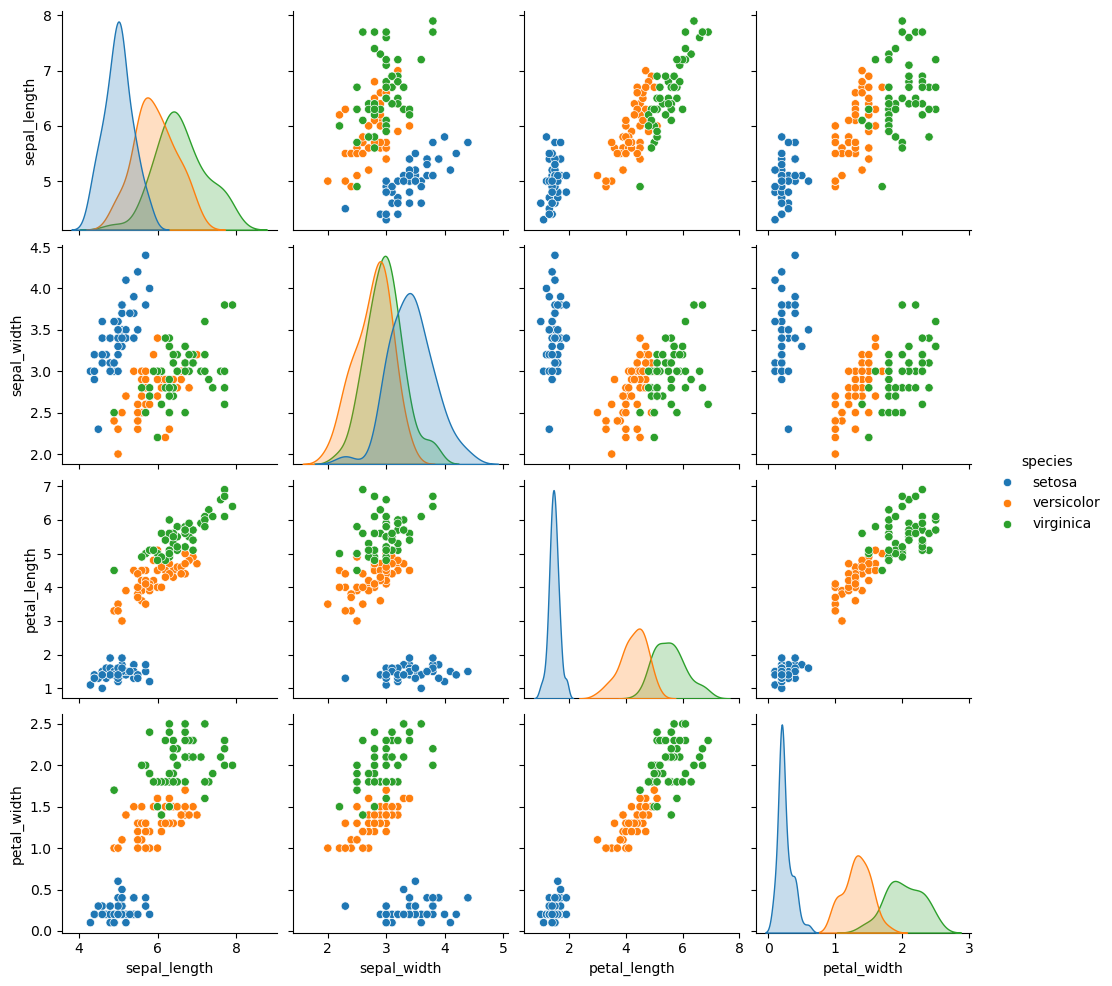

In [78]:
sb.pairplot(iris,hue='species')

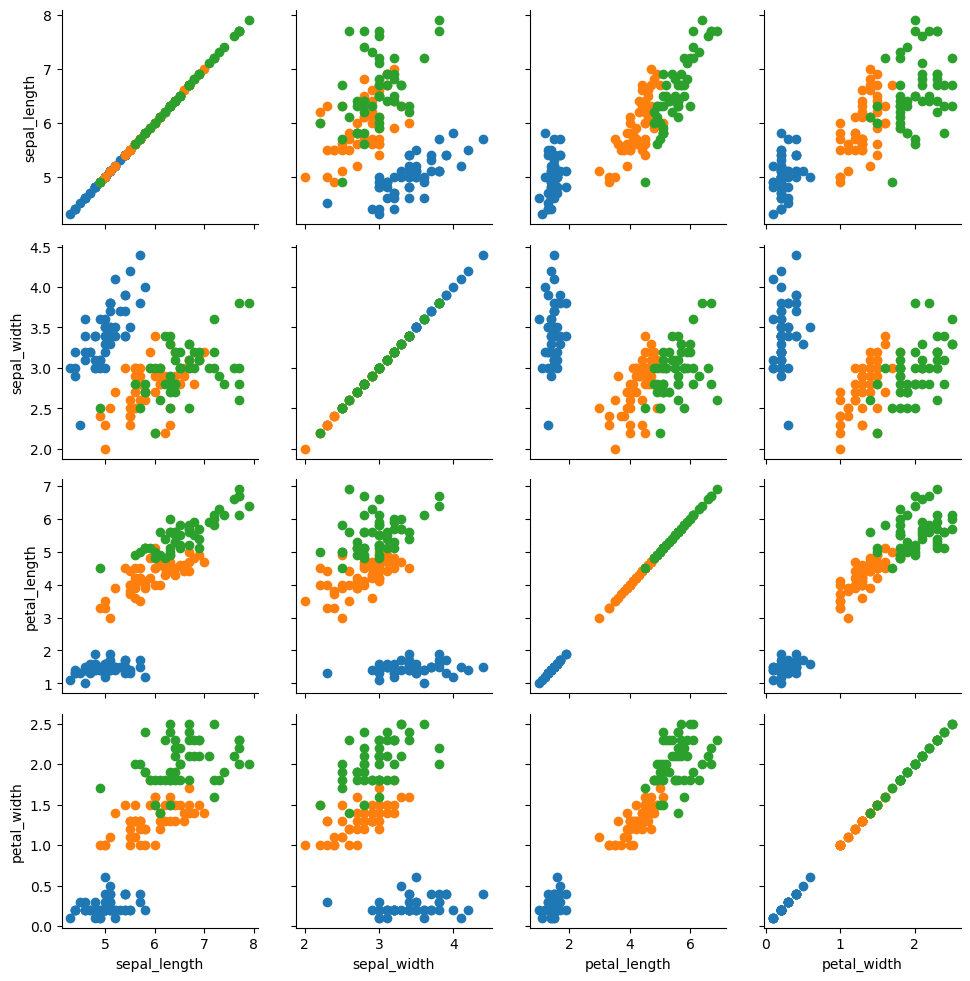

In [82]:
g = sb.PairGrid(iris,hue='species')
g.map(plt.scatter)

c:\Users\MuzuvukileNqwiliso\anaconda3\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\MuzuvukileNqwiliso\anaconda3\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\MuzuvukileNqwiliso\anaconda3\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\MuzuvukileNqwiliso\anaconda3\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


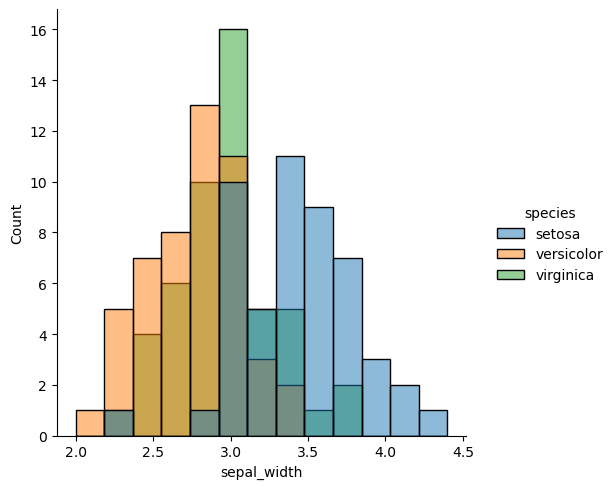

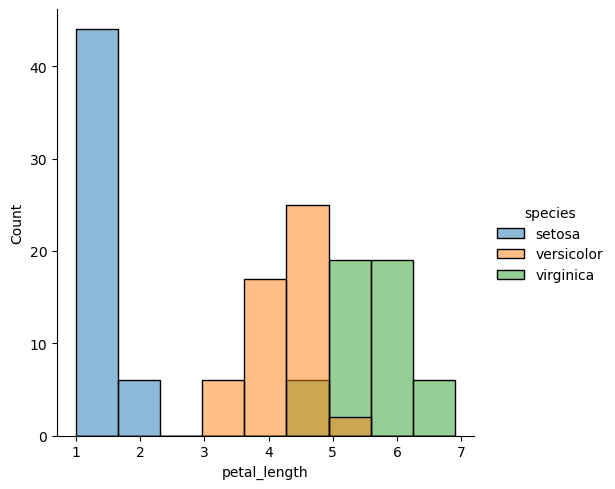

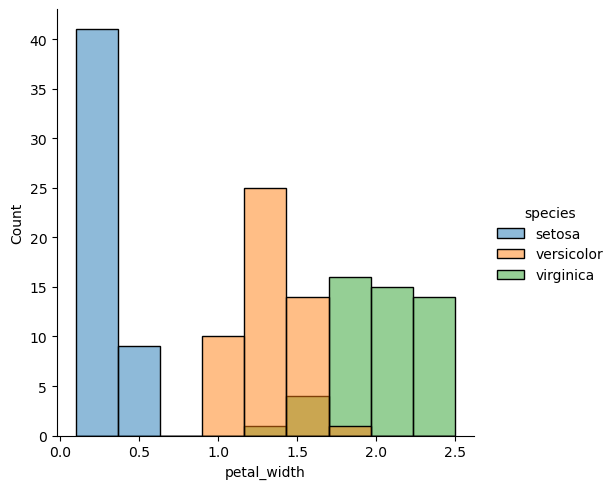

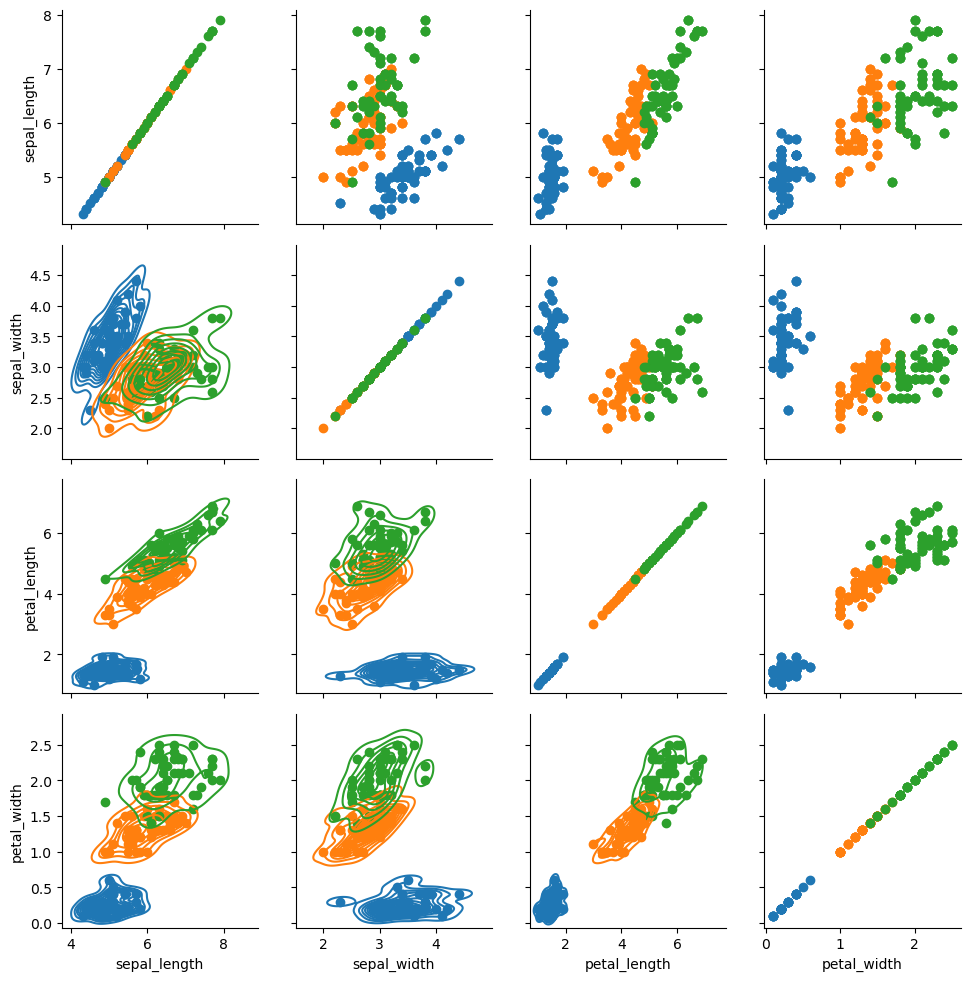

In [86]:
g.map_diag(sb.displot)
g.map_upper(plt.scatter)
g.map_lower(sb.kdeplot)

In [89]:
tips = sb.load_dataset('tips')

In [1]:
g = sb.FacetGrid(data=tips, col= 'time', row='smoker')
g.map(sb.displot,'total_bill')

NameError: name 'sb' is not defined

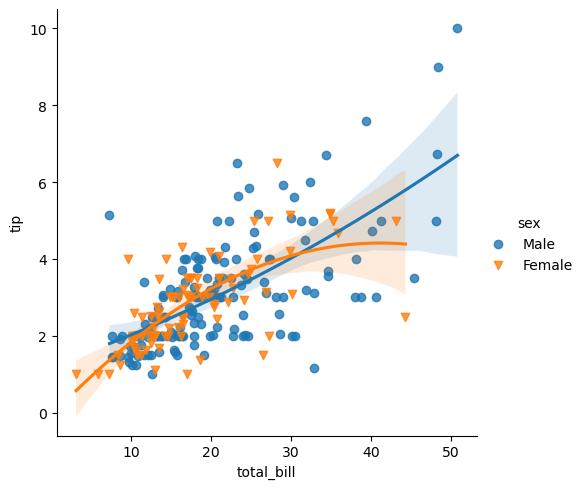

In [100]:
sb.lmplot(x='total_bill',y='tip',data=tips,hue='sex',order=2,markers=['o','v'])

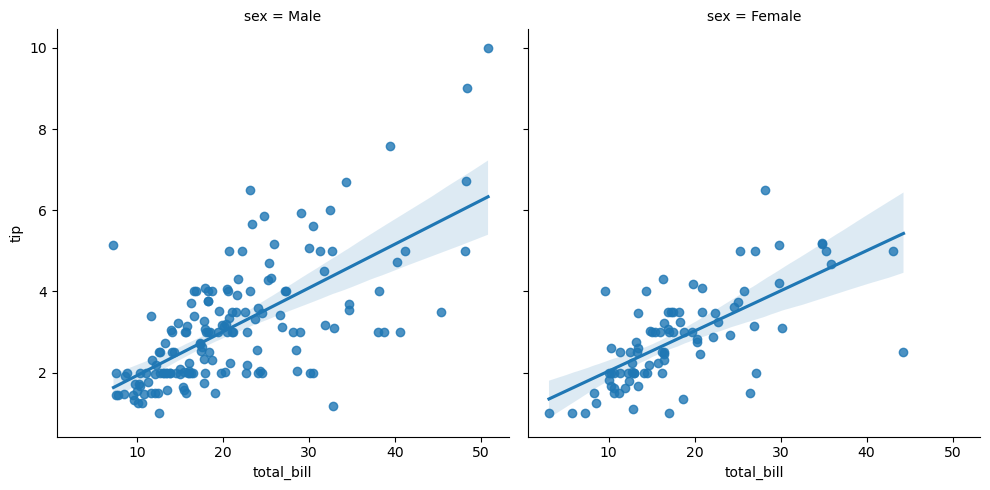

In [101]:
sb.lmplot(x='total_bill',y='tip',data=tips,col='sex')

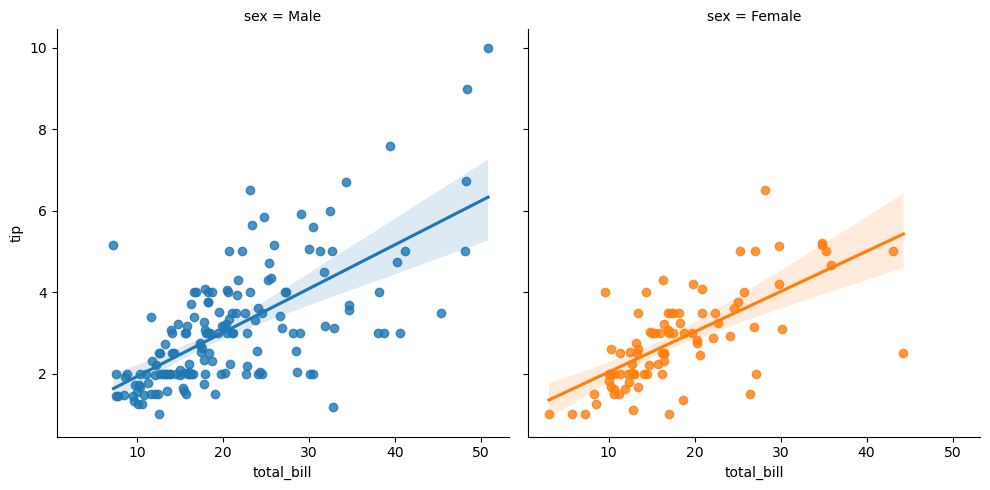

In [102]:
sb.lmplot(x='total_bill',y='tip',data=tips,col='sex',hue='sex')

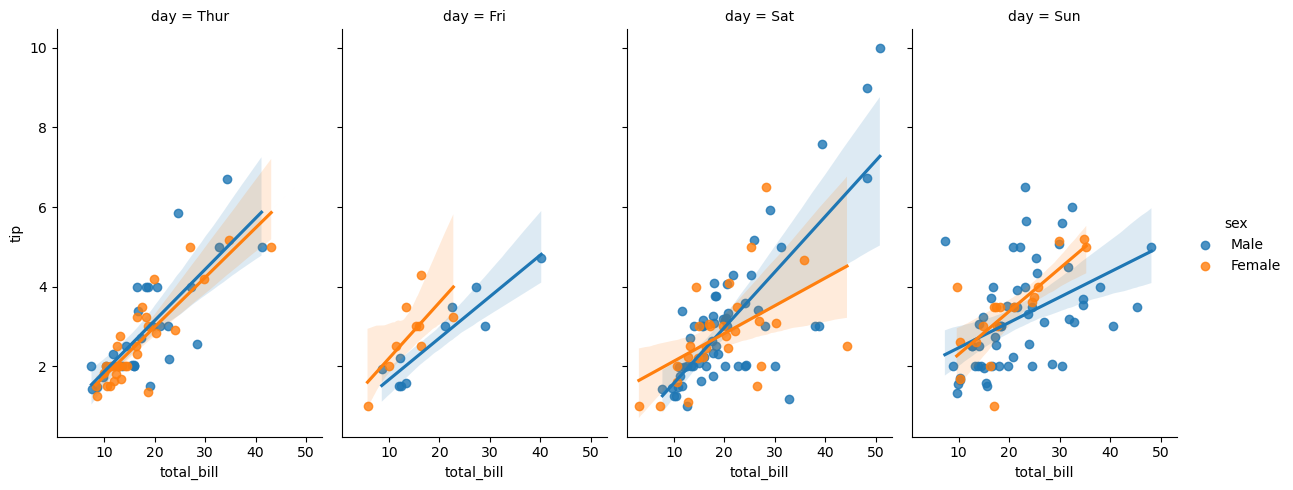

In [109]:
sb.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex', aspect=0.6,legend='sex')


# **Color Style**

In [117]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='sex', ylabel='count'>

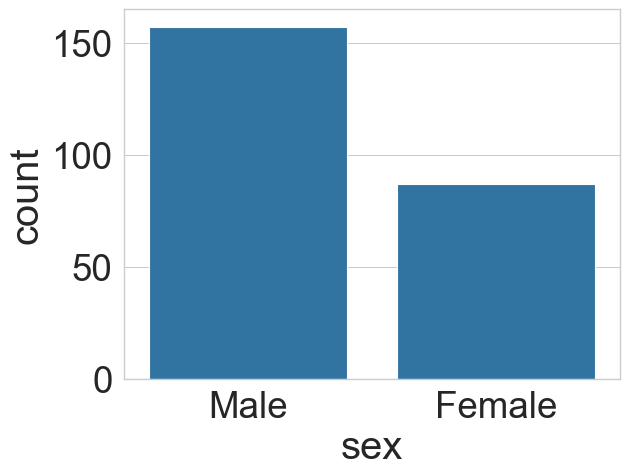

In [125]:
sns.set_style('whitegrid')
sns.set_context('paper',font_scale=3)
sns.countplot(x='sex',data=tips)

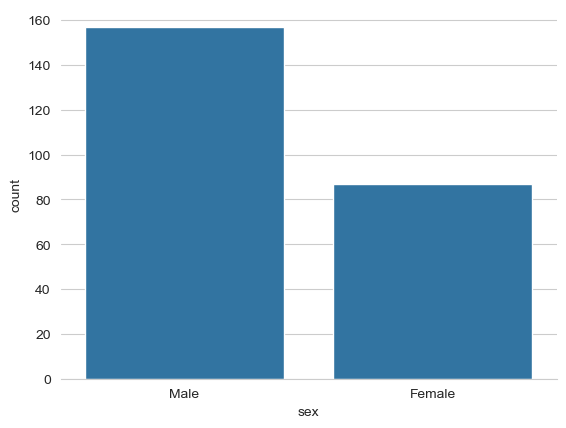

In [122]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)
sns.despine(left=True, right=True
            )

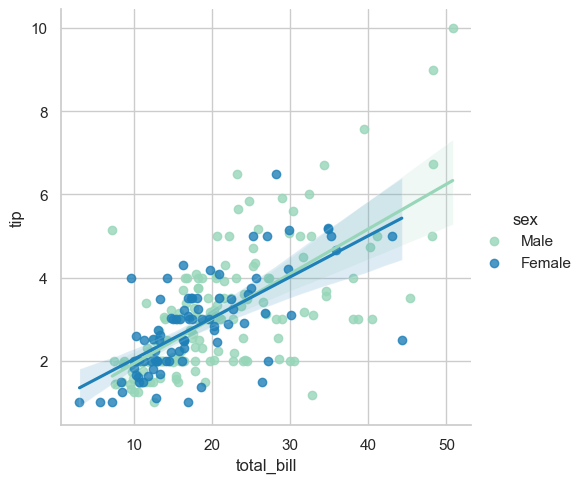

In [130]:
sns.set_context('notebook',font_scale=1)
sns.lmplot(x='total_bill',y='tip',data=tips,palette='YlGnBu',hue='sex')